# Implementation of Activation Functions

# Sigmoid

In [1]:
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [2]:
sigmoid(50)

1.0

In [3]:
sigmoid(5000)

1.0

In [4]:
sigmoid(-500)

7.124576406741285e-218

In [5]:
sigmoid(0.5)

0.6224593312018546

# tanh

In [6]:
def tanh(x):
  return (math.exp(x) - math.exp(-x))/(math.exp(x)+math.exp(-x))

In [7]:
tanh(100)

1.0

In [8]:
tanh(-100)

-1.0

In [9]:
tanh(1)

0.7615941559557649

# ReLU

In [10]:
def relu(x):
  return max(0, x)

In [11]:
relu(500)

500

In [12]:
relu(-500)

0

# LeakyRelu

In [13]:
def leaky_relu(x):
  return max(0.01*x, x)

In [14]:
leaky_relu(-500)

-5.0

In [15]:
leaky_relu(-5)

-0.05

In [16]:
leaky_relu(500)

500

# Linear

In [17]:
def linear(x):
  return x

In [18]:
linear(500)

500

In [19]:
linear(-500)

-500

# Project - Loan Application MLP Model

# Data Preparation and pre-processing

In [20]:
import os
import numpy as np
import pandas as pd

In [21]:
train_ds = pd.read_excel('/content/Loan_Application.xlsx')
train_ds.head()

,ID,Decision,Selfcon_Code,Tier_1,Tier_2,AccoClass,LoanType,Gender,Etype,Doc_pf,...,Term,Dwnpay,BankSave,CalcEmi,IIR,IAR,FOIR,LTV,LVR,dwnp_prop_p
0,1,0,1,0,0,0,1,0,1,0,...,84,300000,0,4087.159912,7.999922,11.000000,22.300176,40.000000,40.0,60.000000
1,2,0,1,0,0,0,1,0,0,1,...,180,130000,0,4924.810059,21.999509,38.999129,32.858975,71.000036,71.0,28.888889
2,3,1,1,0,0,0,0,0,1,1,...,84,557000,0,11712.969727,36.000030,56.000047,36.000030,17.999999,47.0,52.696310
3,4,1,1,0,0,1,1,0,1,1,...,180,666500,0,15390.040039,36.999736,52.999656,36.999736,56.000009,60.0,39.993999
4,5,1,1,0,0,0,1,0,1,1,...,180,151000,0,15390.040039,40.999654,57.000148,40.999654,51.000008,87.0,13.119027


In [22]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1570 non-null   int64  
 1   Decision      1570 non-null   int64  
 2   Selfcon_Code  1570 non-null   int64  
 3   Tier_1        1570 non-null   int64  
 4   Tier_2        1570 non-null   int64  
 5   AccoClass     1570 non-null   int64  
 6   LoanType      1570 non-null   int64  
 7   Gender        1570 non-null   int64  
 8   Etype         1570 non-null   int64  
 9   Doc_pf        1570 non-null   int64  
 10  Marstat       1570 non-null   int64  
 11  Emp_Type_1    1570 non-null   int64  
 12  Emp_Type_2    1570 non-null   int64  
 13  Emp_Type_3    1570 non-null   int64  
 14  Educlass_2    1570 non-null   int64  
 15  Educlass_1    1570 non-null   int64  
 16  Oriclass_1    1570 non-null   int64  
 17  Oriclass_2    1570 non-null   int64  
 18  eom_25        1570 non-null 

In [23]:
# Setting up Independent and Dependent variable
x = train_ds.iloc[:,2:]
y = train_ds.iloc[:,1] # Dep variable - "Decision"

In [24]:
y.value_counts()

1    1255
0     315
Name: Decision, dtype: int64

The provided code sets up independent variables x (all columns except the first two) and the dependent variable y ('Decision') from the train_ds DataFrame. The output shows an imbalance in the 'Decision' column, with 1255 instances of '1' and 315 instances of '0'. This suggests a potential bias in the dataset towards one outcome, highlighting the need for careful consideration in model training to address this imbalance.

In [25]:
315/(1255+315)*100

20.063694267515924

The calculation reveals that the minority class '0' in the 'Decision' column constitutes approximately 20.06% of the dataset. This percentage further underscores the imbalance in the dataset, emphasizing the importance of using appropriate strategies for handling imbalanced data in any predictive modeling or analysis.

In [26]:
x.head(2)

,Selfcon_Code,Tier_1,Tier_2,AccoClass,LoanType,Gender,Etype,Doc_pf,Marstat,Emp_Type_1,...,Term,Dwnpay,BankSave,CalcEmi,IIR,IAR,FOIR,LTV,LVR,dwnp_prop_p
0,1,0,0,0,1,0,1,0,1,1,...,84,300000,0,4087.159912,7.999922,11.000000,22.300176,40.000000,40.0,60.000000
1,1,0,0,0,1,0,0,1,1,0,...,180,130000,0,4924.810059,21.999509,38.999129,32.858975,71.000036,71.0,28.888889


The code snippet displays the first two rows of the independent variables x from the train_ds DataFrame. This subset includes a wide range of variables like 'Selfcon_Code', 'Tier_1', 'Tier_2', 'AccoClass', 'LoanType', 'Gender', 'Etype', 'Doc_pf', 'Marstat', 'Emp_Type_1', and several others, amounting to 36 columns in total. The output provides a glimpse into the diversity and type of data available in the dataset, which includes both categorical and numerical features. This variety in features suggests that the dataset can offer a comprehensive basis for predictive modeling, such as for loan decision analysis. However, careful preprocessing and feature selection might be necessary to optimize model performance.

In [27]:
num_inputs = x.shape[1]
print("Total no of independent variable : {}".format(num_inputs))

Total no of independent variable : 36


The code snippet calculates the number of independent variables in the DataFrame x and then prints out this number. By using x.shape[1], the snippet determines that there are 36 independent variables in the dataset. This information is crucial for understanding the dimensionality of the dataset, which can impact the choice of machine learning models and the complexity of the analysis. It indicates a moderately high-dimensional feature space, suggesting the need for careful feature selection or dimensionality reduction techniques to improve model performance and avoid overfitting.

In [28]:
# Split the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [29]:
x_train.shape

(1256, 36)

The code snippet performs a split of the dataset into training and validation sets using train_test_split from sklearn.model_selection. The split is made with 20% of the data reserved for the validation set (test_size=0.2) and the rest for training. The use of stratify=y ensures that the distribution of the 'Decision' variable is similar in both the training and validation sets, which is particularly important given the previously noted imbalance in the dataset.

The output, (1256, 36), shows the shape of the x_train dataset, indicating that it contains 1256 instances and 36 features. This split is a critical step in preparing the data for modeling, as it allows for the assessment of the model's performance on unseen data, thus providing insights into its generalization capability.

# Please note - Feature Scaling is Mandatory in Deep Neural Network

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)

In [31]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.192768,-0.696156,-0.761495,-0.970189,0.277825,-0.305163,0.921835,-0.604332,0.328000,0.979509,...,0.533285,0.634178,-0.174014,-0.119952,-0.630528,-0.864033,-0.784048,-0.750035,-0.594775,0.849991
1,0.192768,-0.696156,1.313207,-0.970189,0.277825,-0.305163,-1.084793,1.654719,-3.048784,-1.020919,...,0.533285,-0.273340,-0.174014,-0.542250,0.965971,-0.491625,0.801671,0.524279,-0.027202,0.044289
2,0.192768,-0.696156,1.313207,-0.970189,0.277825,-0.305163,0.921835,-0.604332,0.328000,0.979509,...,0.533285,-0.211863,-0.174014,1.569233,0.590249,-0.165831,0.428486,0.831875,0.540370,-0.742947
3,0.192768,-0.696156,1.313207,1.030727,0.277825,-0.305163,0.921835,-0.604332,0.328000,0.979509,...,0.533285,-0.425569,-0.174014,-1.293939,-0.536723,0.159907,-0.690876,0.787935,-0.245499,0.395345
4,0.192768,1.436459,-0.761495,1.030727,0.277825,-0.305163,0.921835,1.654719,0.328000,0.979509,...,0.533285,0.048682,-0.174014,0.724639,-1.475750,0.904912,2.478676,0.436396,-2.777746,-0.160334


The snippet applies StandardScaler to normalize the x_train and x_valid datasets, ensuring that each feature contributes equally to the analysis by centering them around zero with unit variance. This process is crucial for algorithms sensitive to feature scale. The output shows the first five rows of the scaled x_train data, indicating successful standardization of the features.

In [32]:
pd.DataFrame(x_valid).head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.192768,1.436459,-0.761495,-0.970189,0.277825,-0.305163,-1.084793,1.654719,0.328,-1.020919,...,-1.083042,-0.829562,-0.143477,0.684525,1.518072,0.149652,1.350044,1.677233,1.380294,-1.423241
1,0.192768,-0.696156,-0.761495,-0.970189,0.277825,-0.305163,0.921835,-0.604332,0.328,0.979509,...,0.533285,-0.244066,-0.174014,1.146938,0.120729,0.625513,0.988203,0.040920,-0.245499,-0.665497
2,0.192768,-0.696156,-0.761495,1.030727,0.277825,-0.305163,0.921835,-0.604332,0.328,0.979509,...,0.533285,-0.829562,-0.174014,-0.964545,-0.818380,-0.910574,-0.970632,1.007642,0.715008,-0.968594
3,0.192768,-0.696156,1.313207,1.030727,0.277825,-0.305163,0.921835,-0.604332,0.328,0.979509,...,0.533285,1.690999,-0.174014,0.302344,1.153674,1.137452,0.988106,-0.530326,-0.944050,1.326261
4,0.192768,-0.696156,1.313207,1.030727,0.277825,-0.305163,0.921835,-0.604332,0.328,0.979509,...,0.533285,-0.536814,-0.174014,0.302344,-0.160983,0.206634,-0.317674,-1.013687,0.627689,-0.833884


The code snippet displays the first five rows of the scaled x_valid dataset, represented as a pandas DataFrame. It indicates that the validation data has been successfully standardized using the StandardScaler, with each feature adjusted to have a mean of zero and a standard deviation of one. This consistent scaling between the training and validation sets is crucial for the reliable evaluation of machine learning models.

# Model Building

In [33]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [34]:
classifier = Sequential()
# Hidden Layer
classifier.add(Dense(input_dim=num_inputs, activation='relu', units=50))
# output layer
classifier.add(Dense(activation='sigmoid', units=1))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1850      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1901 (7.43 KB)
Trainable params: 1901 (7.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


This code snippet defines a simple neural network classifier using TensorFlow and Keras. The model, named classifier, is a Sequential model with two layers:

1. A hidden layer with 50 units, using the ReLU (Rectified Linear Unit) activation function. The input_dim is set to the number of independent variables (36), ensuring the model can process the input data correctly.

2. An output layer with 1 unit, using the sigmoid activation function, suitable for binary classification tasks like the one implied by the 'Decision' variable.

The model summary output shows that the first dense layer has 1,850 parameters, and the second dense layer has 51 parameters, totaling 1,901 trainable parameters. This architecture, while relatively simple, is often effective for binary classification problems. The use of ReLU activation in the hidden layer helps mitigate the vanishing gradient problem, and the sigmoid function in the output layer is appropriate for binary decision outputs.

In [35]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
hist = classifier.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=32, epochs=100)

Epoch 1/100
40/40 [==============================] - 3s 13ms/step - loss: 0.6643 - accuracy: 0.6123 - val_loss: 0.5120 - val_accuracy: 0.7962
Epoch 2/100
40/40 [==============================] - 0s 6ms/step - loss: 0.4842 - accuracy: 0.7930 - val_loss: 0.4513 - val_accuracy: 0.8089
Epoch 3/100
40/40 [==============================] - 0s 6ms/step - loss: 0.4380 - accuracy: 0.8073 - val_loss: 0.4306 - val_accuracy: 0.8057
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 0.4105 - accuracy: 0.8153 - val_loss: 0.4187 - val_accuracy: 0.8153
Epoch 5/100
40/40 [==============================] - 0s 6ms/step - loss: 0.3891 - accuracy: 0.8288 - val_loss: 0.4096 - val_accuracy: 0.8153
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 0.3730 - accuracy: 0.8336 - val_loss: 0.4022 - val_accuracy: 0.8153
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 0.3599 - accuracy: 0.8424 - val_loss: 0.4018 - val_accuracy: 0.8057
Epoch 8/100


The code snippet involves compiling and training a neural network model on the loan application dataset. The model is compiled with the Adam optimizer, binary cross-entropy loss function, and tracks accuracy as the metric. Training is conducted over 100 epochs with a batch size of 32.

The output shows the model's performance across epochs, including training and validation loss and accuracy. Initially, both training and validation accuracy improve, but as epochs increase, the training accuracy continues to rise (reaching 97.53% by epoch 100), while the validation accuracy plateaus around 80%. This pattern suggests the model might be overfitting to the training data, as indicated by the increasing gap between training and validation accuracy. To address this, techniques like adding dropout layers, implementing early stopping, or adjusting the model's complexity could be considered.

In [37]:
# Model Prediction and Evaluation

from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_valid)
y_pred = (y_pred > 0.5)
print("Accuracy : {0}%".format(accuracy_score(y_valid, y_pred)*100))

10/10 [==============================] - 0s 2ms/step
Accuracy : 80.2547770700637%


The code evaluates a neural network model on a validation dataset. It calculates the accuracy, which is approximately 80.25%, indicating the model's performance in correctly predicting outcomes.

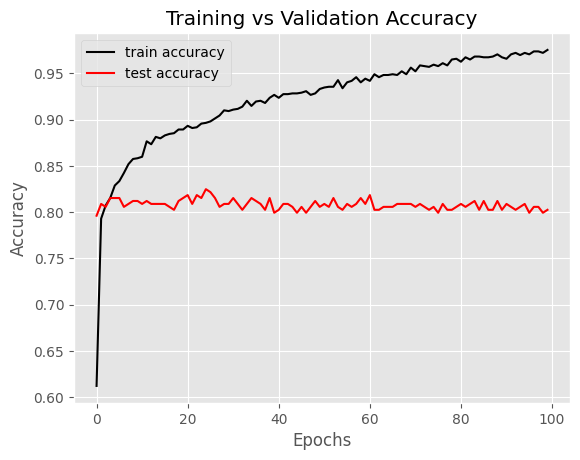

In [38]:
# Validation with visualisation

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(np.arange(0,100), hist.history['accuracy'], label='train accuracy', color='black')
plt.plot(np.arange(0,100), hist.history['val_accuracy'], label='test accuracy', color='red')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The graph shows the training accuracy of a machine learning model increasing to near 98% over 100 epochs, indicating good learning on the training set. However, the validation accuracy plateaus around 80%, suggesting the model is overfitting as it does not generalize as well to new data. There's a notable gap between the training and validation accuracy, highlighting the need for strategies to mitigate overfitting.

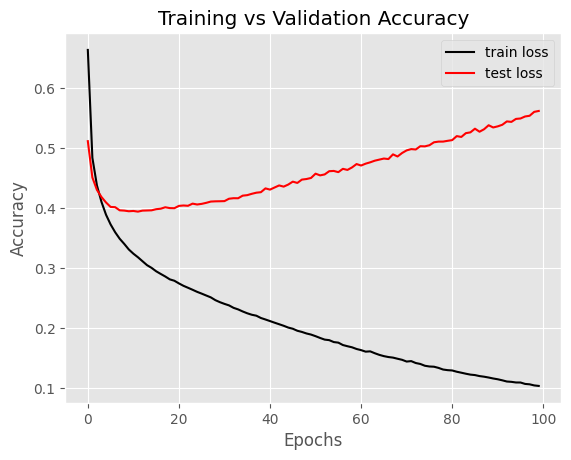

In [39]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(np.arange(0,100), hist.history['loss'], label='train loss', color='black')
plt.plot(np.arange(0,100), hist.history['val_loss'], label='test loss', color='red')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The graph should depict loss over epochs, not accuracy, as indicated by the code snippet. It shows training loss decreasing, which is good, but validation loss increases after an initial drop, suggesting overfitting. The labels in the graph need correction to reflect loss, not accuracy.